In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/game-of-throne-chapter-1/got1.txt


2025-06-29 08:02:48.814356: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751184169.058061      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751184169.125382      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Sample Text:
 this edition contains the complete text of the original hardcover edition.

not one word has been omitted.

a clash of kings

a bantam spectra book

publishing history

bantam spectra hardcover edition published february 1999

bantam spectra paperback edition / september 2000

spectra and the portra
Total Vocabulary: 15036


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-06-29 08:03:04.664594: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.0522 - loss: 7.4988 - val_accuracy: 0.0503 - val_loss: 6.9286
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.0540 - loss: 6.5593 - val_accuracy: 0.0503 - val_loss: 6.9891
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.0550 - loss: 6.4513 - val_accuracy: 0.0566 - val_loss: 7.0569


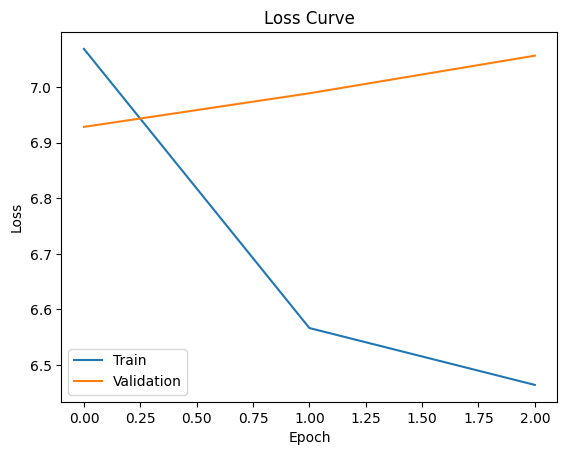


Generated Text 1:
the king in the the of of the had of the had of the had of the had of the had of the

Generated Text 2:
winterfell was a had of the had of the had of the had of the had of the had of the had of

Generated Text 3:
jon snow walked the had of the had of the had of the had of the had of the had of the had


In [19]:
# ✅ Game of Thrones LSTM Text Generator (Word-Level)

# 🎯 Objective:
# - Preprocess the text
# - Tokenize and generate sequences
# - Train LSTM to predict next word
# - Generate text from seed input
# - Plot training & validation loss

# 📦 Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

# 🔹 Step 1: Load and Preprocess Text
with open('/kaggle/input/game-of-throne-chapter-1/got1.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()

# Optional cleaning (comment if needed)
# text = re.sub(r'[^a-zA-Z\s]', '', text)

print("Sample Text:\n", text[:300])

# 🔹 Step 2: Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
sequence_data = tokenizer.texts_to_sequences([text])[0]

vocab_size = len(tokenizer.word_index) + 1
print("Total Vocabulary:", vocab_size)

# 🔹 Step 3: Create Sequences
sequence_data = sequence_data[:50000]  # Prevent memory issues
sequences = []
for i in range(5, len(sequence_data)):
    seq = sequence_data[i-5:i+1]  # 5 input + 1 target
    sequences.append(seq)

sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)

# 🔹 Step 4: Build LSTM Model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=5))
model.add(LSTM(64))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 🔹 Step 5: Train Model
history = model.fit(X, y, epochs=3, validation_split=0.2, verbose=1)

# 🔹 Step 6: Plot Loss Curve
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 🔹 Step 7: Generate Text
def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=5, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += ' ' + word
                break
    return seed_text

# 🔹 Step 8: Show Generated Outputs
print("\nGenerated Text 1:")
print(generate_text("the king in", 20))

print("\nGenerated Text 2:")
print(generate_text("winterfell was a", 20))

print("\nGenerated Text 3:")
print(generate_text("jon snow walked", 20))
